
# CSCI 2000U - Scientific Data Analysis

Authors:

Aanisha Newaz,
Japnit Ahuja,
Islam Nuryyev,
Jessica Patel
   
<b> Chosen Dataset:
    https://www.kaggle.com/mylesoneill/world-university-rankings

## Introduction

Having to choose a university after high school is difficult for most students because of the many options available. Everyone wants to get into the best universities in their country or the best countries in the world. The dataset World University Ranking helps us see what factors have the most impact on the university’s ranking which will help us in our future decision making when choosing a university for masters or PhD. It also allows us to see the quality of education and the influence of the institution overall. 

Some questions we are interested in studying are: 

1. What effect does national rank have on the world ranking?
2. What impact does quality of education have on publications and patents?
3. What attribute has the greatest effect/best relation with world ranking?
4. Are there certain attributes or qualities of an institution that have a greater impact on it’s ranking based on the year it was conducted (2012 - 2015)?
5. Do the top 3 countries value different qualities more in an institution? What countries (if any) do not align with the world wide trend in terms of the desired qualities?
6. Can this dataset be used to predict the world ranking accurately?
7. How does the rankings for the top country vary over time depending on governmental educational policies/reforms?
8. How do the features, citation, publication and influence relate to each other?

Overall we want to know what affects the world university rankings and how does it change throughout the years? Are there any attributes that correlate to the world ranking and if there are, how are they correlated?

Team Members: 

Aanisha Newaz,
Japnit Ahuja, 
Islam Nuryyev, 
Jessica Patel 

All team members worked on a data analysis question and we came together to gather our findings to draw a simple conclusion.


## Description of Data

Name of dataset: World University Rankings

Chosen Dataset: https://www.kaggle.com/mylesoneill/world-university-rankings

The World University Rankings dataset collected by Myles O'Neill on www.kaggle.com is a dataset of ranked universities done by three different ranking institutes. For our analysis, we will be using the Center for World University Rankings (https://cwur.org/) dataset. This ranking list launched in 2012 in Saudi Arabia. 

The ranking list was formed from various different sources, including the Science Citation Index Expanded, Social Sciences Citation Index, and the Arts & Humanities Citation Index. These indexes were used to help sort universities based on different attributes.

This dataset has up to fourteen attributes to help determine the chosen ranking for each universities:

    1. World ranking
        World ranking for universities in order from year 2012 - 2015        
    2. Institution
        Name of institutions
    3. Country
        Country of institutions's location
    4. National ranking
        Institution's ranking within it's country of origin
    5. Quality of education
        Rank for quality of education
    6. Alumni employment
        Rank for alumni employment
    7. Quality of faculty
        Rank for quality of faculty
    8. Publications
        Rank for publications
    9. Influence
        Rank for influence
    10. Citations
        Number of students at the university
    11. Broad impact
        Rank for broad impact
    12. Patents
        Rank for patents
    13. Score
        Total score that's used for determining world rank of institution
    14. Year
        Year of ranking (2012 - 2015)

## Analysis of the Data

Broad impact is not available for 2012 and 2013 thus our analysis will be limited to 2014 and 2015. We will be dealing with missing values for broad impact in our machine learning model by replacing them with the mean.

In [2]:
#importing used libraries
import csv
import re
import math
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('cwurData.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

1. How many universities in the world were ranked? 
2. What do the top 3 universities' data look like? Display the top 3 universities.
3. How many different countries are ranked? 
4. Which country appears most often on the list? 
5. What is the range of the total scores?
6. Number of universities ranked each year
7. Basic statistics chart 
8. Graph of the number of times each country been ranked over the 4 years 
9. Graph of the top three countries total count over the years
10. Correlation chart 
11. Correlation heatmap


In [3]:
#1. How many universities in the world were ranked?
institutions = [x['institution'] for x in data]
print("Number of unique universities:",len(np.unique(institutions)))

Number of unique universities: 1024


In [4]:
#2. What do the top 3 universities data look like? Display the top 3 universities.
data[:3]

[{'world_rank': '1',
  'institution': 'Harvard University',
  'country': 'USA',
  'national_rank': '1',
  'quality_of_education': '7',
  'alumni_employment': '9',
  'quality_of_faculty': '1',
  'publications': '1',
  'influence': '1',
  'citations': '1',
  'broad_impact': '',
  'patents': '5',
  'score': '100',
  'year': '2012'},
 {'world_rank': '2',
  'institution': 'Massachusetts Institute of Technology',
  'country': 'USA',
  'national_rank': '2',
  'quality_of_education': '9',
  'alumni_employment': '17',
  'quality_of_faculty': '3',
  'publications': '12',
  'influence': '4',
  'citations': '4',
  'broad_impact': '',
  'patents': '1',
  'score': '91.67',
  'year': '2012'},
 {'world_rank': '3',
  'institution': 'Stanford University',
  'country': 'USA',
  'national_rank': '3',
  'quality_of_education': '17',
  'alumni_employment': '11',
  'quality_of_faculty': '5',
  'publications': '4',
  'influence': '2',
  'citations': '2',
  'broad_impact': '',
  'patents': '15',
  'score': '89

In [5]:
#3. How many different counries are ranked? 
countries = [x['country'] for x in data]
countries = np.unique(countries)
print(countries,'\n',len(countries), 'different countries ranked')

['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Chile' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Iran' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Lebanon' 'Lithuania' 'Malaysia' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Puerto Rico' 'Romania' 'Russia'
 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovak Republic' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Taiwan'
 'Thailand' 'Turkey' 'USA' 'Uganda' 'United Arab Emirates'
 'United Kingdom' 'Uruguay'] 
 59 different countries ranked


In [6]:
#4. Which country appears most often on the list? 
countries_count = {}
for country in [x['country'] for x in data]:
    try:
        countries_count[country] += 1
    except:
        countries_count[country] = 0
countries_count = sorted(countries_count.items(), key= lambda country: country[1], reverse=True)
print(countries_count)

[('USA', 572), ('China', 166), ('Japan', 158), ('United Kingdom', 143), ('Germany', 114), ('France', 108), ('Italy', 95), ('Spain', 80), ('Canada', 71), ('South Korea', 71), ('Australia', 57), ('Taiwan', 45), ('Brazil', 35), ('India', 30), ('Netherlands', 28), ('Switzerland', 25), ('Sweden', 23), ('Austria', 23), ('Israel', 21), ('Finland', 19), ('Belgium', 19), ('Turkey', 19), ('Poland', 17), ('Ireland', 15), ('Iran', 15), ('Portugal', 13), ('Greece', 13), ('Norway', 11), ('Denmark', 11), ('Hong Kong', 11), ('New Zealand', 11), ('Hungary', 11), ('South Africa', 9), ('Czech Republic', 9), ('Russia', 8), ('Saudi Arabia', 7), ('Chile', 7), ('Egypt', 7), ('Argentina', 6), ('Thailand', 5), ('Malaysia', 5), ('Singapore', 4), ('Mexico', 3), ('Slovenia', 3), ('Colombia', 3), ('Romania', 2), ('Iceland', 1), ('Estonia', 1), ('Lebanon', 1), ('Croatia', 1), ('Slovak Republic', 1), ('Serbia', 1), ('Bulgaria', 1), ('Lithuania', 1), ('Uganda', 1), ('United Arab Emirates', 1), ('Uruguay', 1), ('Cypru

In [7]:
#5. What is the range of the total scores?
total_scores = [float(x['score']) for x in data]
print("Range of total scores is:", min(total_scores), "-", max(total_scores))

Range of total scores is: 43.36 - 100.0


In [8]:
#6. Number of universities ranked each year
year_wise_uni_count = {}
for uni in [x for x in data]:
    try:
        year_wise_uni_count[uni['year']].append(uni['institution'])
    except:
        year_wise_uni_count[uni['year']] = [uni['institution']]

print("year - no. of universities")
for i in year_wise_uni_count:
    print(i, "-", len(np.unique(year_wise_uni_count[i])))

year - no. of universities
2012 - 100
2013 - 100
2014 - 1000
2015 - 1000


In [9]:
#7. Basic statistics chart 
df = pd.read_csv('cwurData.csv')
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


Text(0.5, 1.0, 'Count of Countries')

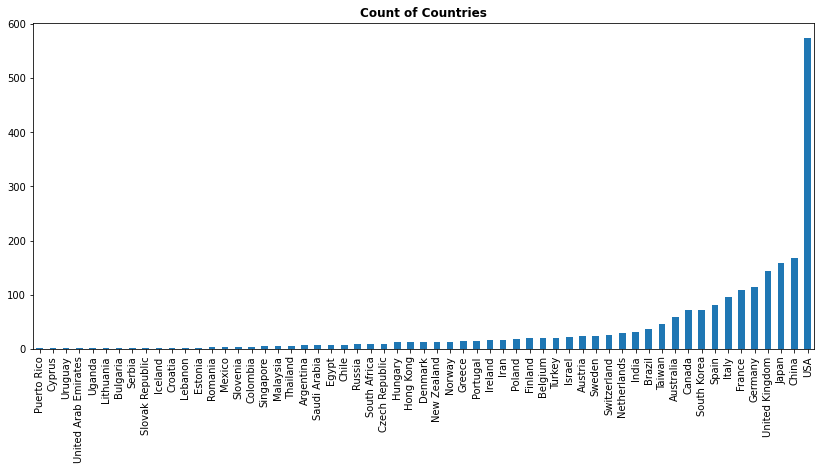

In [10]:
#8. Graph of the number of times each country been ranked over the 4 years 
#country count over 4 years 
country_count = df['country'].value_counts(ascending = True)
country_count.plot(kind='bar', figsize=(14,6), x="country")
plt.title('Count of Countries', weight = 'bold', size = 12)

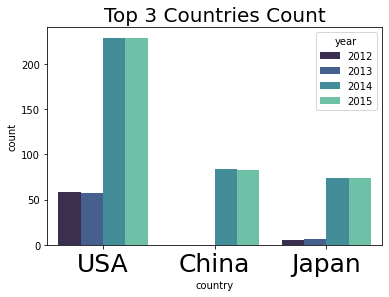

In [11]:
#9. Graph of the top three countries total count over the years
top_3 = ['USA','China','Japan']
sns.countplot(x="country", data=df, order=top_3, hue = df['year'], palette='mako')
plt.xticks(size=25, rotation=0)
plt.title("Top 3 Countries Count",fontsize=20)
plt.show()

In [12]:
#10. Correlation chart 
correlations = df.corr()
correlations

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570


Text(0.5, 1.0, 'Correlation Heatmap')

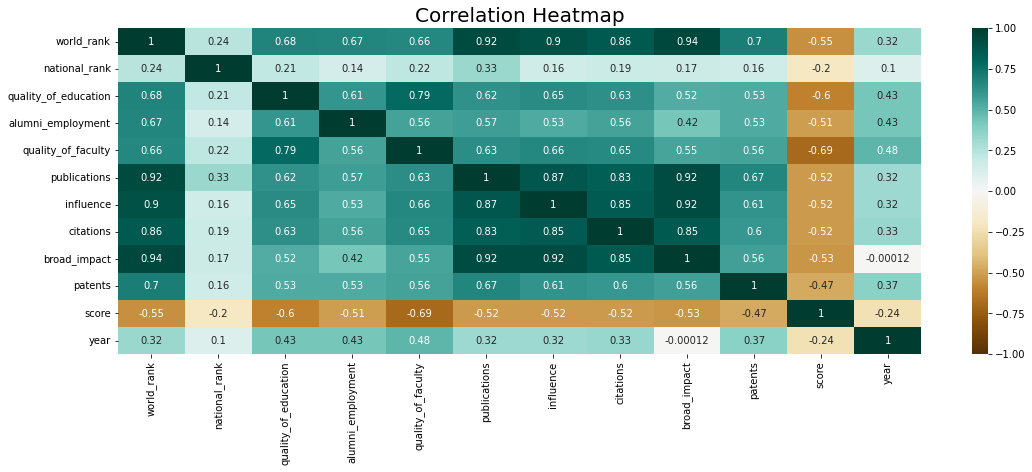

In [13]:
#11. Correlation Heatmap
plt.figure(figsize=(18, 6))
heatmap = sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize': 20})

## Exploratory Data Analysis


### Data analysis questions 

1. What effect does national rank have on the world ranking?  
2. What impact does quality of education have on publications and patents?
3. What attribute has the greatest effect/best relation with world ranking?
4. Are there certain attributes or qualities of an institution that have a greater impact on it’s ranking based on the year it was conducted (2012 - 2015)?
5. Do the top 3 countries value different qualities more in an institution? What countries (if any) do not align with the world wide trend in terms of the desired qualities?
6. Can this dataset be used to predict the world ranking accurately?
7. How does the rankings for the top country vary over time depending on governmental educational policies/reforms?
8. How do the features citation, publication and influence relate to each other?

### Methods expected to apply when processing the data 

- Have side by side comparison of each variable
- Find the Pearson correlation coefficient between institutes and different attributes to investigate the nature and strength of their relation
- Plot the attributes using a scatter plot to study the relationship using matplotlib in python
- calculate and plot the least squares best fit line to approximate the relationship


### Part 1. What effect does national rank have on the world ranking?

According to the correlation heatmap the correlation between national ranking and world ranking is just 0.24 which gave us the impression that national rank and world rank don't follow suit. This didn't follow our expectations thus upon further analysis of the data we discovered that to get the true correlation between the two we would require to compare the national ranking of a specific country to the world ranking of the universities of that country and we can't just compare all the rankings.

Here, we divide the dataframes into country specific dataframes and compare the national rankings in those with the world rankings. 

Correlation between national rank and world rank in USA : 0.9860010876586436
Correlation between national rank and world rank in China : 0.9688857487968721
Correlation between national rank and world rank in Japan : 0.9702150343243905
Correlation between national rank and world rank in UK : 0.9940997556468283
Correlation between national rank and world rank in Germany : 0.9550910351195214
Correlation between national rank and world rank in France : 0.9916718913444764
Correlation between national rank and world rank in Spain : 0.9908139656569962


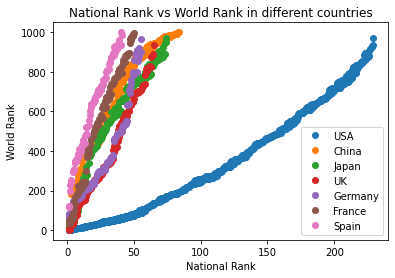

In [14]:
from scipy.stats import pearsonr

usa_df = df[df['country']=='USA']
china_df = df[df['country']=='China']
japan_df = df[df['country']=='Japan']
uk_df = df[df['country']=='United Kingdom']
germany_df = df[df['country']=='Germany']
france_df = df[df['country']=='France']
spain_df = df[df['country']=='Spain']

all_country_df = [usa_df,china_df, japan_df, uk_df, germany_df, france_df, spain_df]
all_labels = ['USA','China','Japan','UK','Germany','France','Spain']
for index in range(len(all_country_df)):
    plt.plot(all_country_df[index]['national_rank'],all_country_df[index]['world_rank'], 'o',label=all_labels[index])
    print("Correlation between national rank and world rank in",all_labels[index],":",pearsonr(all_country_df[index]['national_rank'],all_country_df[index]['world_rank'])[0])

plt.legend(loc="lower right")
plt.ylabel('World Rank')
plt.xlabel('National Rank')
plt.title('National Rank vs World Rank in different countries')
plt.show()

It can be seen from the high correlation (all are greater than 0.95) values that national ranking and world ranking are very highly correlated for all countries. Out of all countries, Spain, France and UK show the highest correlation between national ranking and world ranking. This is confirmed by the graphs of each country as all are linear in shape. 

### Part 2. What impact does quality of education have on publications and patents?

According on the correlation heat map, the correlation between quality of education and publications is 0.62. To verify, we will compute it manually.

In [15]:
n = df.quality_of_education.count()  #number of elemnts in one row

#computing Sxx (Sxx=∑x^2−(∑x)^2/n)
sum_QoE = df.quality_of_education.sum()  
df['squared_QOE']=df['quality_of_education']**2
squared_sum_QOE = df.squared_QOE.sum()
sxx = (squared_sum_QOE - ((sum_QoE *sum_QoE )/n))

#computing Syy (Syy=∑y^2−(∑y)^2/n)
sum_pb = df.publications.sum()
df['squared_pb']=df['publications']**2
squared_sum_pb = df.squared_pb.sum()
syy = (squared_sum_pb - ((sum_pb *sum_pb)/n))

#computing Sxy Sxy=∑xy−(∑x∑y/n)
pb_and_QoE = df["pb_and_QoE"] = df["quality_of_education"] * df["publications"]
pb_and_QoE_sum = pb_and_QoE.sum()
sxy = (pb_and_QoE_sum - ((sum_QoE*sum_pb)/n))

#Pearson’s sample correlation r is given by  Sxy/(√sxx)*(√syy)
pearson_coefficient = sxy/((math.sqrt(sxx))*(math.sqrt(syy)))
np.around(pearson_coefficient,3)
#0.625

0.625

Based on our calculations, the correlation between the quality of education and publications is 0.625, which is reflected onto the correlation heat map. Since Pearson’s Correlation Coefficient (r) is between 0.5 and 0.8 it means that the quality of education and publications have a positive moderate relationship. A positive correlation between quality of education and publications does not necessarily imply a cause and effect relationship.

We will also compute the correlation between the quality of education and patents:

In [16]:
#computing Syy (Syy=∑y^2−(∑y)^2/n)
sum_pt = df.patents.sum()
df['squared_pt']=df['patents']**2
squared_sum_pt = df.squared_pt.sum()
syy2 = (squared_sum_pt - ((sum_pt *sum_pt )/n))

#computing Sxy Sxy=∑xy−(∑x∑y/n)
pt_and_QoE = df["pt_and_QoE"] = df["quality_of_education"] * df["patents"]
pt_and_QoE_sum = pt_and_QoE.sum()
sxy2 = (pt_and_QoE_sum - ((sum_QoE*sum_pt)/n))

#Pearson’s sample correlation r is given by  Sxy/(√sxx)*(√syy)
pearson_coefficient2 = sxy2/((math.sqrt(sxx))*(math.sqrt(syy2)))
np.around(pearson_coefficient2,3)
#0.528

0.528

Based on our calculations, the correlation between the quality of education and publications is 0.528, which also reflects onto our correlation heat map. Since Pearson’s Correlation Coefficient (r) is between 0.5 and 0.8 it means that the quality of education and patents have a positive moderate relationship. A positive correlation between quality of education and patents does not necessarily imply a cause and effect relationship. However this relationship is weaker than the relationship between quality of education and publications.

According to our results, both attributes have a positive moderate relationship.

### Part 3: What attribute has the greatest effect/best relation with world ranking?

#### To answer this, we will create a catplot for the World Rank's correlation to each attribute. We will use the following steps:

 1. Get the list of the attributes and its correlation to 'world_rank'. We will sort the list in ascending order:

In [17]:
world_rank_relations = correlations['world_rank']
world_rank_relations.sort_values(ascending=True)

score                  -0.549098
national_rank           0.238553
year                    0.320844
quality_of_faculty      0.663864
alumni_employment       0.668529
quality_of_education    0.676166
patents                 0.698214
citations               0.856573
influence               0.895871
publications            0.923037
broad_impact            0.942998
world_rank              1.000000
Name: world_rank, dtype: float64

2. Using the sorted list, a new list will be made for labelling the x-axis of our catplot. This will be done so our plot can be in ascending order to help furthur visualize the correlation:

In [18]:
list_of_new_labels = ['score','national_rank','year','quality_of_faculty','alumni_employment','quality_of_education','patents','citations','influence','publications','broad_impact','world_rank']

 3. A seaborn catplot will be constructed using the data from dataframe "correlations" and only use the "world_rank"s correlation data. 

Text(-1.5749999999999957, 0.5, 'correlation coefficient')

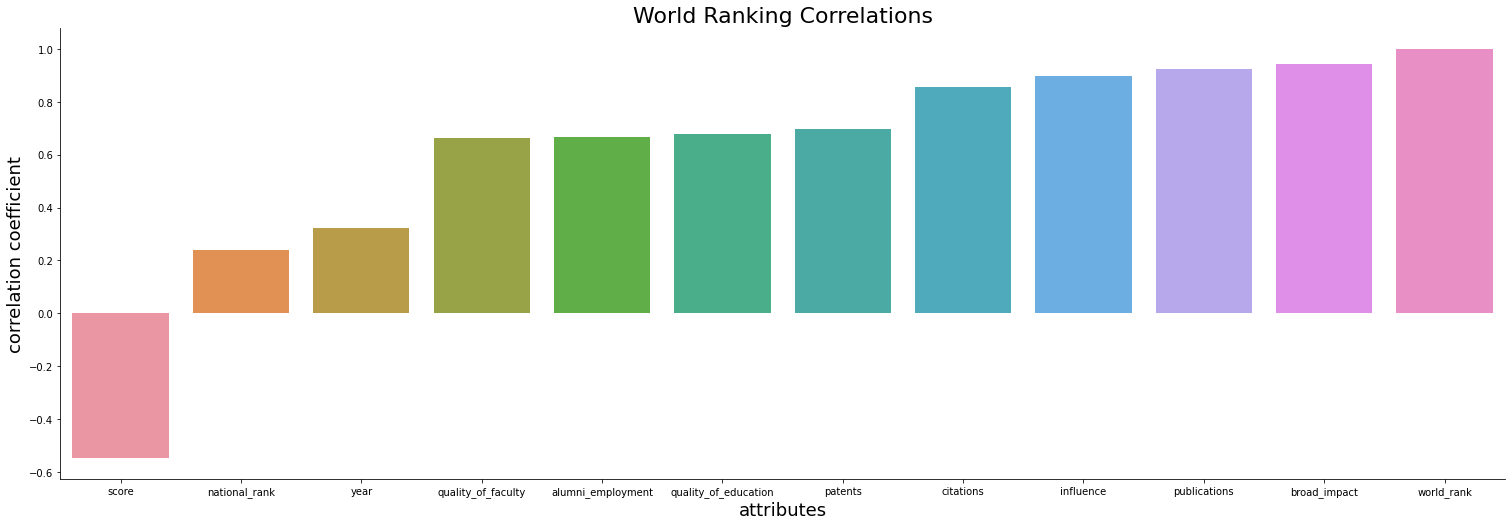

In [19]:
axes = sns.catplot(data=correlations, kind="bar", x='world_rank', y= 'world_rank',height=7, aspect = 3)
axes.set_xticklabels(list_of_new_labels)
plt.title("World Ranking Correlations",fontsize=22)
plt.xlabel("attributes", fontsize = 18)
plt.ylabel("correlation coefficient", fontsize = 18)

 According to the catplot, the attribute that has the greatest affect/relationship with the world rank are broad impact (correlation coefficience (r) of 0.942998), publications (r = 0.923037), influence (r = 0.895871), and citations (r = 0.856573). These top four attributes have a strong positive correlation to the world ranking of universities.
 
 

### Part 4: Are there certain attributes or qualities of an institution that have a greater impact on it’s ranking based on the year it was conducted (2012 - 2015)?


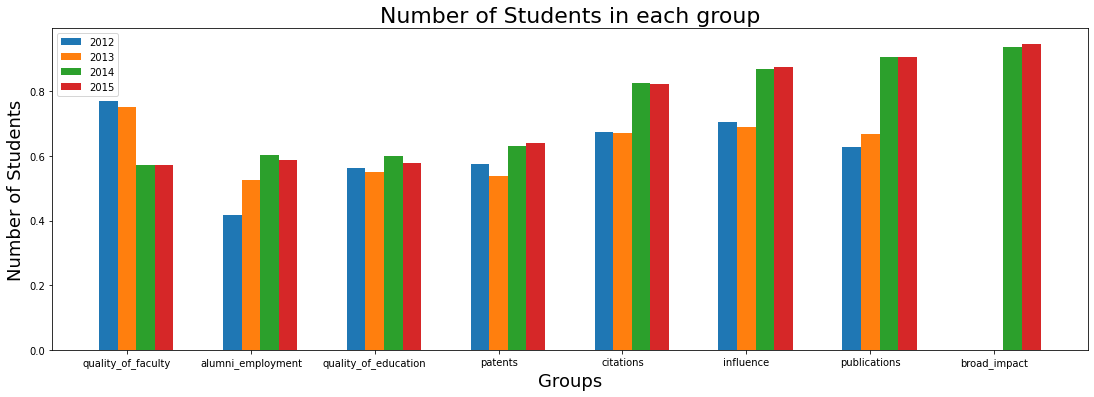

In [20]:
years = [2012,2013,2014,2015]
year_wise_df = []
labels = ['quality_of_faculty','alumni_employment','quality_of_education','patents','citations','influence','publications','broad_impact']

for y in years:
    year_wise_df.append(df[df['year']==y])
fig = plt.figure(figsize=(15,5))
position = [-.15,0,.15,.3]
count = 0

for ydf in year_wise_df:
    year_wise_correlations = ydf.corr()
    year_wise_world_rank_relations = year_wise_correlations['world_rank']
    X_axis = np.arange(len(labels))
    h = [year_wise_world_rank_relations[x] for x in labels] 
    plt.bar(X_axis+position[count],h, 0.15, label=years[count])
    count += 1

plt.tight_layout()
plt.xticks(X_axis, labels)
plt.xlabel("Groups",fontsize= 18)
plt.ylabel("Number of Students",fontsize= 18)
plt.title("Number of Students in each group",fontsize=22)
plt.legend()
plt.show()


For 2012 and 2013, the top 3 correlated features are quality of faculty, citations and influence. For 2014 and 2015, these change to broad impact, publications and influence. This goes to show that an institution's ranking can be better predicted by their impact and influence in the academic world in terms of research and other avenues in 2014 and 2015 compared to 2012 and 2013 where the faculty and number of students were more important.  

Interesting trends to note are how the correlation of quality of faculty which was one of the top 3 features in 2012 and 2013 decreases over the years. For all other features the correlation with the world ranking gets stronger over the years. However, correlation here doesn't imply causation.

Broad impact values for 2012 and 2013 don't exist.

### Part 5: Do the top 3 countries value different qualities more in an institution? What countries (if any) do not align with the world wide trend in terms of the desired qualities?

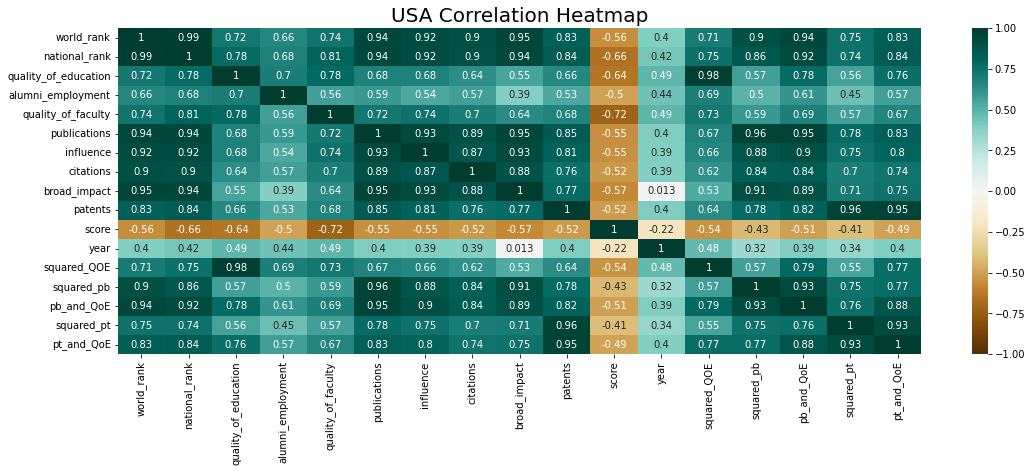

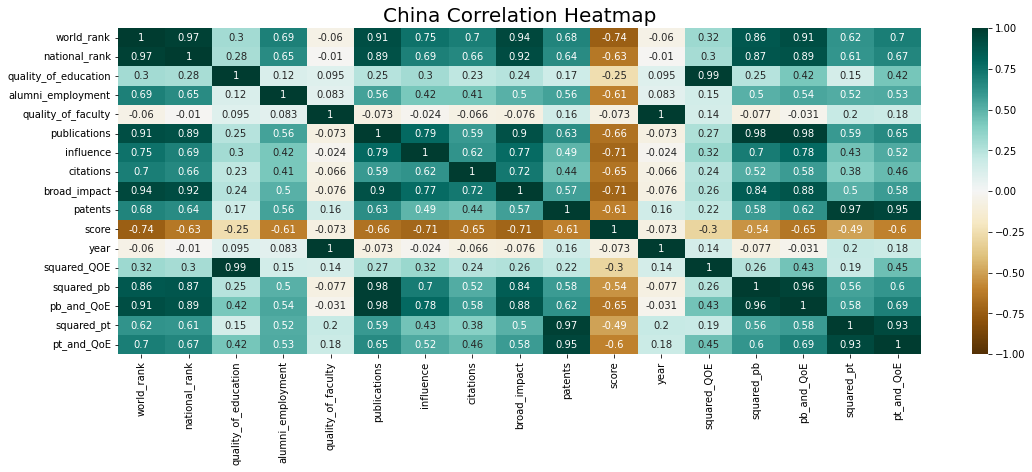

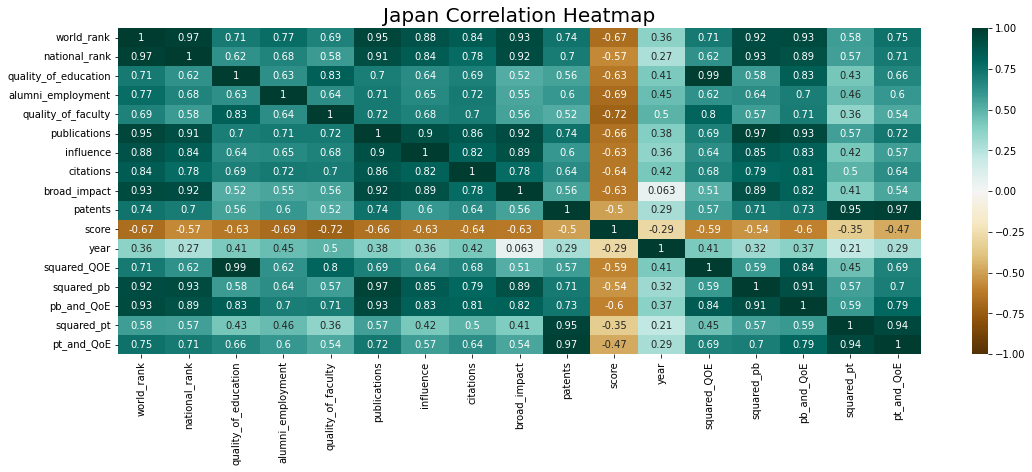

In [21]:
#usa
usa_df = df[df['country']=='USA']
plt.figure(figsize=(18, 6))
usa_heatmap = sns.heatmap(usa_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
usa_heatmap.set_title('USA Correlation Heatmap',fontdict={'fontsize': 20})
plt.show()

#china
china_df = df[df['country']=='China']
plt.figure(figsize=(18, 6))
usa_heatmap = sns.heatmap(china_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
usa_heatmap.set_title('China Correlation Heatmap',fontdict={'fontsize': 20})
plt.show()

#japan
japan_df = df[df['country']=='Japan']
plt.figure(figsize=(18, 6))
usa_heatmap = sns.heatmap(japan_df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
usa_heatmap.set_title('Japan Correlation Heatmap',fontdict={'fontsize': 20})
plt.show()


While USA and Japan have very similar looking correlation heatmaps signifying that they value similar things and follow the global trend, China's correlation heatmap is significantly different when it comes to the feature of quality of faculty. Quality of faculty in China's heatmap has a very low correlation with the world ranking which doesn't follow the global trend.

### Part 6: Can this dataset be used to predict the world ranking accurately?


In [22]:
import sys
!{sys.executable} -m pip install sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [35]:
y = df['world_rank']

In [24]:
#Feature selection for the dataset
ml_df = df[['national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','broad_impact','patents','score']]

In [25]:
#dealing with missing values by replacing them with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
ml_df = imp.fit_transform(ml_df)

In [26]:
#testing and training splits
X_train, X_test, y_train, y_test = train_test_split(ml_df, y, test_size = 0.25, random_state = 0)

In [27]:
#training the model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Evaluation of the regression model

R-squared (R2), which is the proportion of variation in the outcome that is explained by the predictor variables. The Higher the R-squared, the better the model.

Mean squared error (MSE), which is the average squared difference between the observed actual outome values and the values predicted by the model. So, MSE = mean((observeds - predicteds)^2). The lower the MSE, the better the model.


In [28]:
#evaluating the model
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error
print("Root Mean squared error: %.2f" % pow(mean_squared_error(y_test, y_pred),0.5))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.06217899 0.19752714 0.31912921 0.18896394 0.24973972 0.12181765
 0.07718081 0.37576292 0.11181238 1.93009639]
Mean squared error: 5591.82
Root Mean squared error: 74.78
Coefficient of determination: 0.94


For this model, we preproccessed the data by choosing features that are relevant and removing irrelevant features like serial number, year etc. We dealt with missing values by substituting them with the mean. We then divided the dataset into training and testing sets. We built the model on the training set then evaulated the model on the testing set. Based on the r^2 values the model seems to be doing well. The root mean squared error value seems a bit high since the units are 1 rank position but that can be improved with better preprocessing and hyperparameter tuning. Maybe analysing this dataset for each country separately may give better results. 

### Part 7: How does the rankings for the top country vary over time depending on governmental educational policies/reforms?

###### Looking at the top 3 institutions from the top country 

In [29]:
df.loc[(df['country'] >= 'USA') & (df['year'] <= 2012)]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,squared_QOE,squared_pb,pb_and_QoE,squared_pt,pt_and_QoE
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,49,1,7,25,35
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,81,144,108,1,9
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,289,16,68,225,255
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,100,256,160,2500,500
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,4,1369,74,324,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,Georgia Institute of Technology,USA,56,101,67,101,79,101,46,NaN,40,44.71,2012,10201,6241,7979,1600,4040
94,95,Williams College,USA,57,18,15,101,101,101,101,NaN,101,43.89,2012,324,10201,1818,10201,1818
95,96,University of Texas MD Anderson Cancer Center,USA,58,101,101,101,95,46,66,NaN,100,43.88,2012,10201,9025,9595,10000,10100
96,97,University of Nottingham,United Kingdom,6,101,101,87,101,101,101,NaN,92,43.79,2012,10201,10201,10201,8464,9292



From above it can be seen that the top 3 universities for  USA are also the top three in the world which are Harvard University with an international ranking of 1, Massachusetts Institute of Technology placing second, and Stanford University placing third. The year 2012 Barak Obama was elected for president and it was the year that he announced a 400 million dollar expansion of the Race To The Top program. The Race to the Top program is a competition to promote innovative learning from k to 12 to help students stay in school and to give out grants. 

In [30]:
df.loc[df['year'].isin([2013]) & (df['country'].isin(['USA']))]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,squared_QOE,squared_pb,pb_and_QoE,squared_pt,pt_and_QoE
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013,1,1,1,49,7
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013,121,36,66,121,121
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013,4,256,32,1,2
105,6,Columbia University,USA,4,13,8,9,13,9,11,NaN,10,88.21,2013,169,169,169,100,130
106,7,"University of California, Berkeley",USA,5,6,28,6,8,6,4,NaN,19,85.07,2013,36,64,48,361,114
107,8,Princeton University,USA,6,4,14,3,58,35,27,NaN,101,82.17,2013,16,3364,232,10201,404
108,9,University of Chicago,USA,7,9,19,8,37,21,30,NaN,101,79.16,2013,81,1369,333,10201,909
109,10,Yale University,USA,8,10,25,13,20,12,22,NaN,42,78.83,2013,100,400,200,1764,420
110,11,California Institute of Technology,USA,9,5,101,7,38,24,25,NaN,17,77.59,2013,25,1444,190,289,85
111,12,University of Pennsylvania,USA,10,22,5,25,10,10,9,NaN,14,77.24,2013,484,100,220,196,308


From the data above we can see that the top university is the same however, Stanford university now places second internationally and nationally leaving Massachusetts Institute of Technology to place third. The party leading America was still the republican party and not many major changes were made regarding education. The reason for Stanford ranking in second place may be because in 2013 RHSU Edu-Scholar Public Presence Rankings published on the Education Week website, that 11 of the 100 most-influential educational scholars were from the Stanford Graduate School of Education. Which got the university more popularity, thus, it had a higher ranking for influence. It can also be seen that it placed higher than MIT for publications and citations. From previous analysis we know that influence, publications and citations have a great influence on determining the university rankings. Therefore, the reason Stanford ranked higher than MIT is because it ranked higher in many other attributes.

In [31]:
df.loc[df['year'].isin([2014]) & (df['country'].isin(['USA']))]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,squared_QOE,squared_pb,pb_and_QoE,squared_pt,pt_and_QoE
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014,1,1,1,4,2
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014,121,25,55,36,66
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014,9,225,45,1,3
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014,169,196,182,16,52
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014,16,49,28,784,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,874,University of North Dakota,USA,225,355,478,210,935,647,800,832.0,426,44.43,2014,126025,874225,331925,181476,151230
1081,882,Florida Atlantic University,USA,226,355,478,210,848,701,800,819.0,737,44.42,2014,126025,719104,301040,543169,261635
1112,913,University of Southern Mississippi,USA,227,355,478,210,903,840,800,849.0,737,44.38,2014,126025,815409,320565,543169,261635
1122,923,"University of California, Merced",USA,228,355,478,210,957,576,800,923.0,338,44.37,2014,126025,915849,339735,114244,119990


From the data above it can be observed that the top three universities are still from the USA and their rank is the same as in 2013. The year 2014 was the year that America implemented the Common Core State Standards initiative. It is an initiative that specifies what students at each grade level are required to know. It outlines a benchmark in English and Math for each grade level. It can be observed again that Harvard ranks highest in all attributes which is why it is the top-ranked university. We can see that Stanford ranks lower than MIT in some attributes but the ones that correlate to the world ranking Stanford ranks higher than MIT.

In [32]:
df.loc[df['year'].isin([2015]) & (df['country'].isin(['USA']))]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,squared_QOE,squared_pb,pb_and_QoE,squared_pt,pt_and_QoE
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,1,1,1,9,3
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,81,25,45,100,90
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,9,225,45,1,3
1205,6,Columbia University,USA,4,13,6,9,13,13,11,12.0,4,96.14,2015,169,169,169,16,52
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7.0,29,92.25,2015,25,100,50,841,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,901,University of Southern Mississippi,USA,225,367,567,218,913,853,812,850.0,676,44.13,2015,134689,833569,335071,456976,248092
2105,906,Oakland University,USA,226,367,567,218,888,810,812,850.0,871,44.13,2015,134689,788544,325896,758641,319657
2112,913,University of North Dakota,USA,227,367,567,218,917,731,812,867.0,606,44.12,2015,134689,840889,336539,367236,222402
2128,929,University of Texas at El Paso,USA,228,367,442,218,910,838,812,906.0,706,44.10,2015,134689,828100,333970,498436,259102


From the data above it can be seen that the top institutions are the same as the years 2013 and 2014. There were some new education policy changes in the USA however, there were not many major changes in the year 2015. This is probably one of the reasons why for the year 2015 the rankings are mostly the same. 

### Part 8: How do the features citation, publication and influence relate to each other?


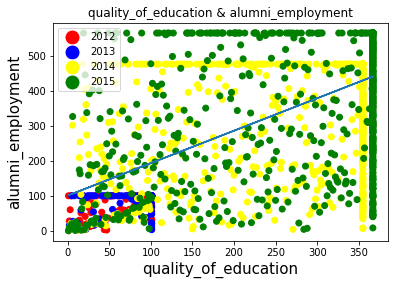

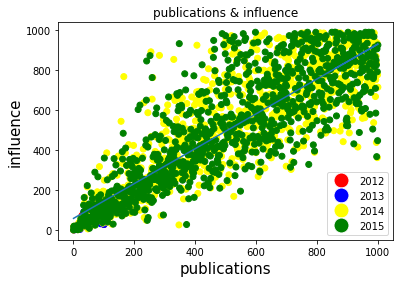

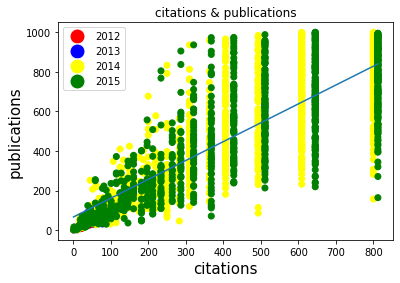

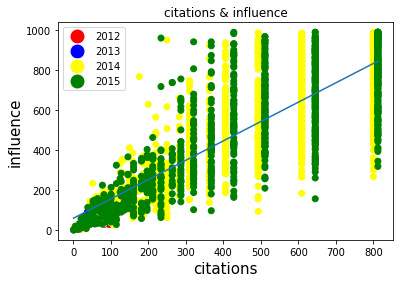

In [33]:
#the least squares best fit line to approximate the relationship
from matplotlib.lines import Line2D

def pltcolor(years):
    cols = []
    for year in years:
        if year == 2012:
            cols.append('red')
        elif year == 2013:
            cols.append('blue')
        elif year == 2014:
            cols.append('yellow')
        else:
            cols.append('green')
    return cols


def line(column1, column2):
    df[column1] = df[column1].astype('int64')
    df[column2] = df[column2].astype('int64')
    df['year'] = df['year'].astype('int64')
    
    quality_of_education = df[column1];
    alumni_employment = df[column2];
    years = df['year'];

    x = np.array(quality_of_education);
    y = np.array(alumni_employment);
    
    plt.title(column1 + " & " + column2)
    plt.xlabel(column1, fontsize=15)
    plt.ylabel(column2, fontsize=15)
    

    a, b = np.polyfit(x, y, 1);
    cols = pltcolor(years);
    plt.scatter(x, y, c = cols);
    plt.plot(x, a*x+b);
    
    
    custom_lines = [Line2D([0], [0], marker='o', color='w', label='2012',
                          markerfacecolor='r', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='2013',
                          markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='2014',
                          markerfacecolor='yellow', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='2015',
                          markerfacecolor='g', markersize=15)]
    
    plt.legend(handles=custom_lines)
    
    plt.show();

line('quality_of_education','alumni_employment')
line('publications', 'influence');
line('citations','publications')
line('citations', 'influence')

#### Quality of Education & Alumni Employment
The x-axis represents the quality of education, and the y-axis represents alumni employment.
In this diagram we see that the spread is both on the x and y axes. 
It means that there is no obvious relationship between a university ranking in the top by quality of education and higher alumni employment. 
For example, in years 2014 and 2015, several universities can be ranked in the same place by the quality of education, but can be placed in different ranks by alumni employment.

#### Publications & Influence 
The x-axis represents the number of publications, and the y-axis represents influence. What we can read from the diagram and the line of best-fit approximation is that the higher in rankings of publications a university appears, the more influent it is.The dots are concentrated around values from 0 to 200 in both x and y axes.

#### Citations & Publications
The x-axis represents the citations, y-axis represents the publications.

From the diagram we can see that the spread is wider on the y-axis (publications).
It means that even though some universities are in top by publications, some of the their publications are not being cited much.

Also, the dots are concentrated in the range of values from 0 to 200 in both x and y axes. Some universities are ranked in the top both by citations and publications.Citations and publications.

#### Citations and Influence

The x-axis represents the citations, y-axis represents the influence.

From the diagram we can see that the spread is wider on the y-axis (influence).
It means that even though some universities are in top by influence, some of the their publications are not being cited a lot.

Also, the dots are concentrated in the range of values from 0 to 200 in both x and y axes. Some universities are ranked in the top both by citations and influence.

## Challenges

A challenge we faced while analyzing the data was when we had to graph the correlations. Some of us had a  difficult time figuring out how to size the graphs and the axis accordingly. Some of us had trouble with figuring out how to plot the correlations so that the data makes sense and it can be easy to visualize for the reader. At first when finding the correlation we did all the steps by hand step by step instead of using df.corr() because we did not know about this data frame feature. However, through research on dataframes we were able to find corr() and were able to use it to easily find the correlation of all attributes.  A challenge we faced working with the ML model was dealing with the missing values since there were a variety of methods that we could use to impute them. The method that worked best for the model seemed to be replacing the missing values with the mean. Another aspect which was hard is determining if the root mean square error is small enough or not. A very small value would signify overfitting so it is hard to determine what small means. The current value that we got is around 70 which seems on the higher end but it’s not that high when compared to the range of the ranking values which go up to a 1000.

## Potential Data Science

We can use this data to recommend a university based on the most important criteria for the prospective students. A student might be looking to find a university with the best rank for quality of education and publication or a student maybe looking to find a university with the best alumni employment. Thus, this data could be used to make recommendations to students based on different criteria. We can also use our  findings from the data to create a data visualization so that it is easier for a student to choose a university based on the ranking in each attribute.

Universities also can use this dataset as a guideline to increase their ranks and the aspects they need to improve.This data could also be converted to a machine learning model for the prediction of the rank based on its attributes.Thus, an institute could get an approximate value of their ranking compared to others based on the previous trends. We tried a preliminary attempt at this by creating a linear regression model in the above parts to predict the world ranking based on certain features of the dataset. Thus, with more data processing and hyper parameter tuning this seems like a viable application for this dataset.

## Conclusion

This dataset was challenging because of the multifaceted information available that spanned across different years and different countries. Thus, it was hard to analyse data when it would be broken down to country specific or year specific data. We tackled this issue by looking at the data from the over the years global viewpoint but also by analysing data based on the country and year. Seeing how the data changes over each year and in different countries presented some interesting insights.  Initially when comparing the data we did not expect to get a low correlation between the national rank and world rank. However we rectified this analysis by doing a country specific analysis which revealed what we expected in terms of a high correlation between the national rank and world rank. We also did not think that publications and influence would have such a high correlation with world ranking. However, after breaking it down and analyzing the data we found that there was a high correlation and this was again proven when we researched the top universities in the United States. In conclusion, we were able to answer our initial question “what attributes affect the world university rankings and how does it change throughout the years.”  We found that broad impact, influence, and publications have a high correlation with world ranking. They have the greatest influence when rolling out world university rankings. We also found that national ranking and international ranking are very closely related. 